In [1]:
import process_chile_gdp_data as pcd

df = pcd.process_data_for_synth()
df.head()

,year,region_name,gdp_cap,population,ed_superior,ed_superior_cap,agropecuario,pesca,mineria,industria_m,electricidad,construccion,comercio,transporte,servicios_financieros,vivienda,personales,publica,id,growth_rate
0,1985,I De Tarapacá,2212588.545,NaN,NaN,NaN,0.009879,0.109209,0.057236,0.153727,0.017591,0.058760,0.090434,0.085300,0.041656,0.067401,0.123343,0.125412,1.0,NaN
1,1986,I De Tarapacá,2273234.037,NaN,NaN,NaN,0.009903,0.127265,0.060959,0.145300,0.017266,0.069915,0.087143,0.088118,0.042979,0.065055,0.119930,0.121847,1.0,NaN
2,1987,I De Tarapacá,2268484.676,NaN,NaN,NaN,0.009903,0.083250,0.047446,0.145348,0.018077,0.095254,0.100225,0.087799,0.047529,0.064671,0.119737,0.120035,1.0,NaN
3,1988,I De Tarapacá,2275506.186,NaN,NaN,NaN,0.010086,0.072526,0.051224,0.151336,0.016154,0.084226,0.102094,0.086618,0.051466,0.064217,0.118528,0.126855,1.0,NaN
4,1989,I De Tarapacá,2446640.978,NaN,NaN,NaN,0.009318,0.088220,0.062924,0.146503,0.015185,0.054298,0.108763,0.096535,0.054859,0.059684,0.109518,0.116224,1.0,NaN


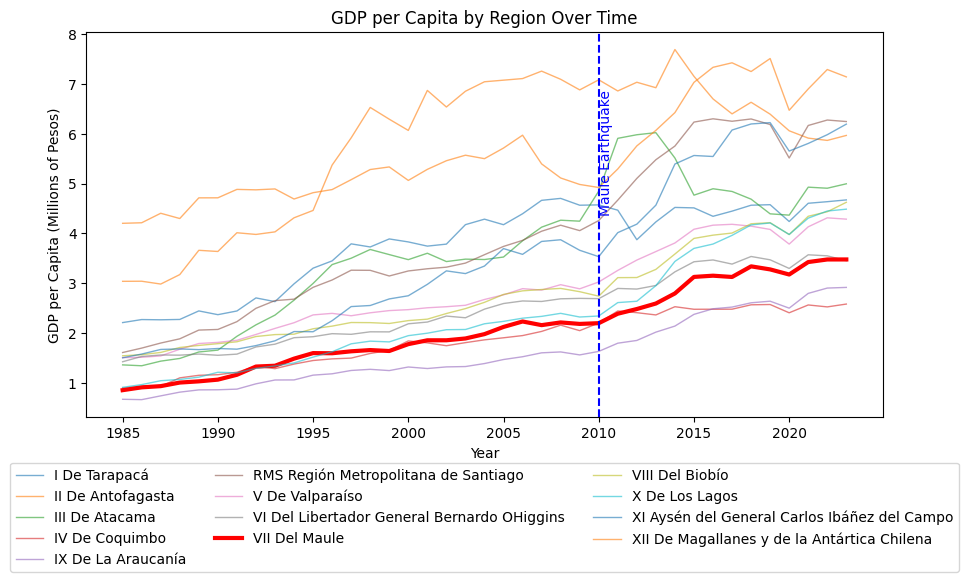

In [2]:
#tools.display_dataframe_to_user(name="Extended GDP per Capita Data", dataframe=merged_df)
import matplotlib.pyplot as plt

gdp_per_capita = df.pivot(index='year', columns='region_name', values='gdp_cap')
# Plot each region's GDP per capita over time with prominence to VII Del Maule and the requested modifications
plt.figure(figsize=(10, 6))
for region in gdp_per_capita.columns:
    if region == 'VII Del Maule':
        plt.plot(gdp_per_capita.index, gdp_per_capita[region]/1000000, label=region, linewidth=3, color='red')
    else:
        plt.plot(gdp_per_capita.index, gdp_per_capita[region]/1000000, label=region, linewidth=1, alpha=0.6)

# Add a vertical line at 2010 with an annotation for the earthquake
plt.axvline(x=2010, color='blue', linestyle='--')
plt.text(2010, plt.ylim()[1]*0.7, 'Maule Earthquake', rotation=90, verticalalignment='center', color='blue')

plt.xlabel('Year')
plt.ylabel('GDP per Capita (Millions of Pesos)')
plt.title('GDP per Capita by Region Over Time')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.tight_layout()
plt.show()


In [3]:
import sys
sys.path.insert(0, '../src')
import nz_util

nz = nz_util.clean_data_for_synthetic_control()
nz.to_csv('../inter/nz.csv', index=False)

In [4]:
nz.head()

,Year,Region,Gross Domestic Product,GDP per capita,Population,Agriculture,Administrative and Support Services,Construction,Education and Training,Financial and Insurance Services,...,"Information Media, Telecommunications and Other Services",Manufacturing,"Professional, Scientific, and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade,Tertiary,regioncode
0,2000,Auckland,40539.0,33958.0,1193800.0,0.004490,0.023632,0.045758,0.035891,0.052394,...,0.087200,0.168134,0.085646,0.024594,0.063766,0.046720,0.049631,0.085843,NaN,2.0
1,2000,Bay of Plenty,5837.0,23920.0,244000.0,0.070584,0.013192,0.054480,0.036320,0.021072,...,0.037177,0.174919,0.040260,0.025869,0.066473,0.051739,0.063389,0.037005,NaN,4.0
2,2000,Canterbury,13129.0,26604.0,493500.0,0.055678,0.019880,0.046919,0.047833,0.028258,...,0.071369,0.166806,0.050880,0.031229,0.054231,0.048747,0.054079,0.051261,NaN,13.0
3,2000,Gisborne,968.0,20918.0,46300.0,0.102273,0.013430,0.056818,0.054752,0.011364,...,0.039256,0.136364,0.033058,0.035124,0.061983,0.050620,0.058884,0.025826,NaN,5.0
4,2000,Hawke's Bay,3640.0,24692.0,147400.0,0.098077,0.013736,0.047802,0.035440,0.017857,...,0.028846,0.257418,0.035714,0.029396,0.053022,0.045055,0.048901,0.031868,NaN,6.0
